In [1]:
from fastai.vision import *

In [2]:
path=Path('data/sorted_data2')

In [3]:
path.ls()

[PosixPath('data/sorted_data2/neutral'),
 PosixPath('data/sorted_data2/disgust'),
 PosixPath('data/sorted_data2/.ipynb_checkpoints'),
 PosixPath('data/sorted_data2/models'),
 PosixPath('data/sorted_data2/calm'),
 PosixPath('data/sorted_data2/fearful'),
 PosixPath('data/sorted_data2/surprised'),
 PosixPath('data/sorted_data2/sad'),
 PosixPath('data/sorted_data2/happy'),
 PosixPath('data/sorted_data2/angry')]

In [4]:
??get_transforms

In [5]:
tfms = get_transforms(do_flip=False,flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=5)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=144, num_workers=4).normalize(imagenet_stats)

432*288

In [7]:
data.classes

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

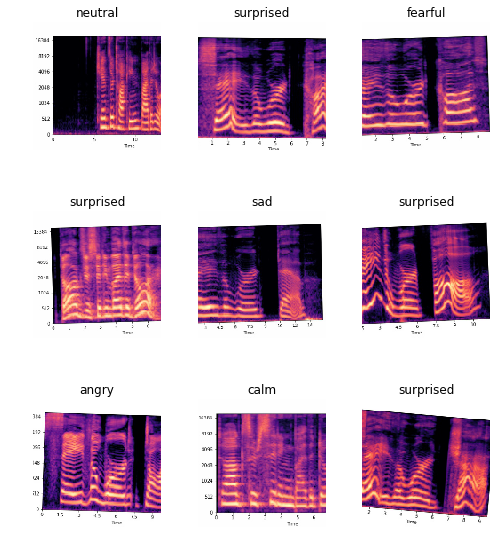

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.903992,1.606525,0.449893,00:10
1,2.311392,1.435439,0.507463,00:08
2,1.931923,1.204411,0.577825,00:08
3,1.647064,1.128499,0.599147,00:08
4,1.493571,1.116546,0.588486,00:08


In [11]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


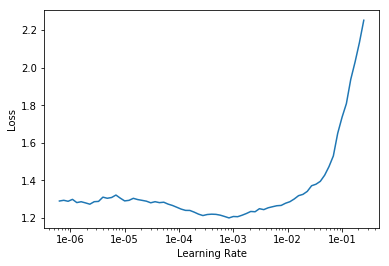

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.258497,1.024088,0.633262,00:11
1,1.142974,0.908020,0.663113,00:11
2,1.021574,0.812884,0.697228,00:11
3,0.935001,0.791057,0.710021,00:11
4,0.879942,0.784591,0.714286,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


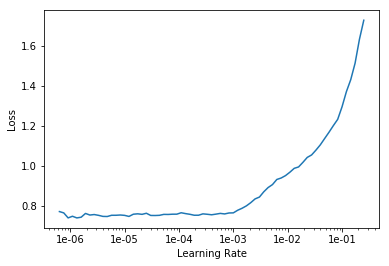

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.771386,0.758053,0.735608,00:11
1,0.722679,0.711234,0.737740,00:11
2,0.683399,0.716247,0.731343,00:11
3,0.626276,0.682626,0.744136,00:11
4,0.592185,0.671955,0.748401,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


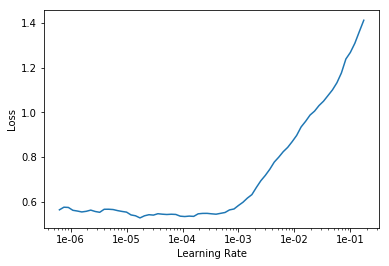

In [18]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.391362,0.599757,0.780384,00:11
1,0.391886,0.650113,0.769723,00:11
2,0.369666,0.615565,0.793177,00:11
3,0.345813,0.600803,0.795309,00:11
4,0.313525,0.593540,0.801706,00:11


Now I will use transfer learning

In [22]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=288, num_workers=4).normalize(imagenet_stats)
data.batch_size=25

In [23]:
learn.data=data
data.train_ds[0][0].shape

torch.Size([3, 288, 288])

In [24]:
data.classes

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

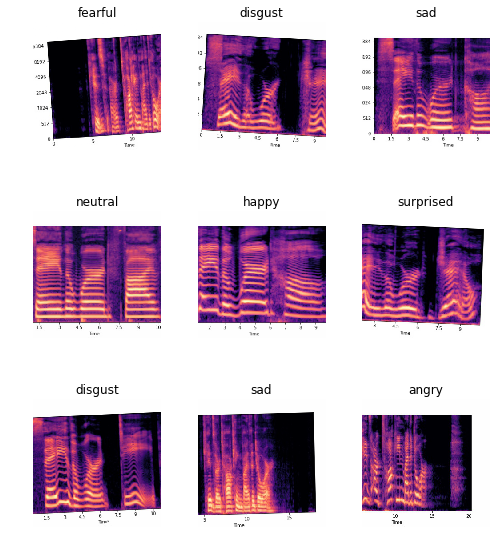

In [25]:
data.show_batch(rows=3, figsize=(7,8))

In [26]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


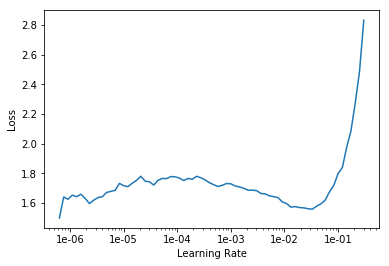

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.733698,1.548947,0.509595,00:27
1,1.545228,1.314952,0.552239,00:27
2,1.393959,1.246338,0.562900,00:27
3,1.367425,1.161287,0.575693,00:27
4,1.374092,1.163991,0.573561,00:27


In [30]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


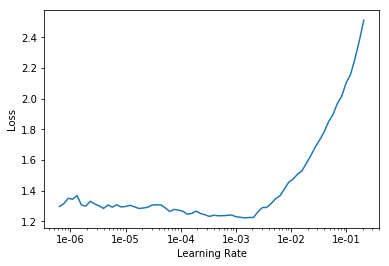

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.181798,0.849303,0.686567,00:36
1,0.953773,0.743032,0.724947,00:36
2,0.703774,0.635869,0.773987,00:36
3,0.546511,0.588481,0.782516,00:36
4,0.483718,0.588802,0.780384,00:36


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


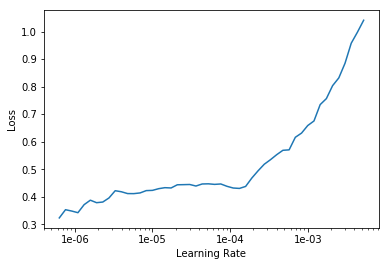

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, slice(1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.437672,0.582152,0.788913,00:36
1,0.447802,0.616804,0.761194,00:36
2,0.394805,0.564588,0.799574,00:36
3,0.372629,0.548097,0.808102,00:36
4,0.335876,0.554840,0.808102,00:36


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


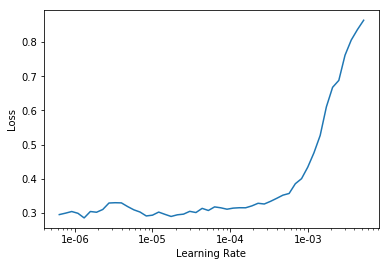

In [35]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, slice(1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.315683,0.556298,0.818763,00:36
1,0.291032,0.544751,0.820895,00:36
2,0.281995,0.544666,0.814499,00:36
3,0.280217,0.539143,0.816631,00:36
4,0.278927,0.552232,0.810235,00:36


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


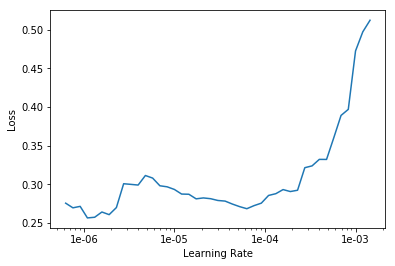

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(3, slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.318713,0.583562,0.784648,00:36
1,0.328193,0.561887,0.810235,00:36
2,0.246364,0.515104,0.831556,00:36


In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

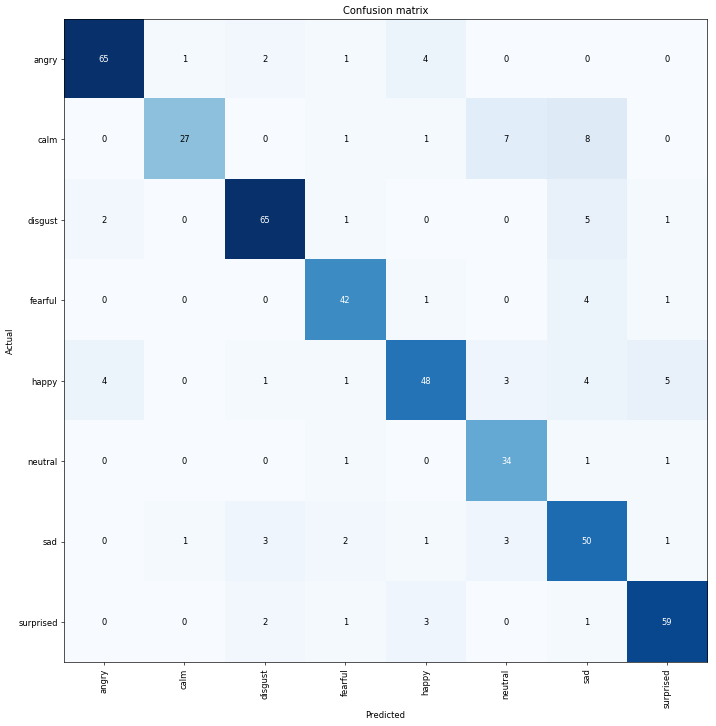

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)